# Big Data & BI – Optional Intro Notebook

**Topic:** Data, EDA


## Learning Objectives
By the end, you can:
- Download a real dataset from the open source projects.
- Evaluate a list of **KPIs**.
- Run simple analysis.


- Open "https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/GTNEJD"
- Download peoplesun_hh_anon.tab as csv (comma seperated valaues).
- Files named peoplesun_hh_odk_codebook.xlsx and peoplesun_hh_odk_choices.xlsx are also needed to decode the questions and answers.
- Place it in your data folder

## Key Performance Indicators (KPIs)

### KPI 1 — Electrification Rate (%)
**Definition:** Percentage of households with any access to electricity (grid or off-grid like solar/generator).  
**Formula:** Electrification Rate = (Households_with_electricity / Total_households) * 100  
**Purpose:** Measures extent of access.

---

### KPI 2 — Supply Reliability (Outages or Hours Without Power)
**Definition:** Average number of power outages per week OR hours without power per day among connected households.  
**Formula (example):** Avg_outages_per_week = SUM(outages_per_week) / N_connected_households  
**Purpose:** Captures quality/stability of supply.

---

### KPI 3 — Energy Burden (%)
**Definition:** Average share of monthly household spending (or income) devoted to electricity expenses.  
**Formula:** Energy_Burden = (Electricity_expenditure / Total_expenditure_or_income) * 100  
**Purpose:** Assesses affordability.


## 1) Setup & load

In [2]:
# --- setup ---
import pandas as pd
import numpy as np
import re
from pathlib import Path

DATA_PATH = Path("../data/peoplesun_hh_anon.csv")  # students: place file here

# Helpful options
pd.set_option("display.max_colwidth", 120)
pd.set_option("display.max_columns", 120)

# --- load ---
# If the CSV has a different delimiter, change sep="," accordingly.
df = pd.read_csv(DATA_PATH, sep=",", low_memory=False)

print("Rows:", len(df))
df.head()


Rows: 3599


,zone,state,eaid,lga,urca_cat,hhid,q102,q103,q104,q105,q106,q107,q108,q109,q110,q201,q202,q203_1,q203_2,q203_3,q203_4,q204,q205,q206,q207_1,q207_2,q207_3,q208,q209,q210,q210_1,q211,q211__1,q211__2,q211__3,q211__4,q211__5,q211__6,q211__7,q211__8,q211__9,q211__10,q211__11,q211__12,q211__0,q211__96,q211_1,q212,q212_1,q213,q213_1,q213_1__1,q213_1__2,q213_1__96,q214,q214__1,q214__2,q214__3,q214__4,q214__5,...,q402__4,q402__5,q402__6,q404,q404__1,q404__2,q404__3,q404__4,q404__5,q404__6,q404__7,q404__8,q404__9,q404__10,q404__11,q404__0,q404__96,q404_1,q405,q405_1,q405_1__1,q405_1__2,q405_1__3,q405_1__4,q405_1__5,q405_1__6,q405_1__7,q405_1__8,q405_1__9,q405_1__10,q405_1__11,q405_1__12,q405_1__13,q405_1__96,q405_2,q501,q501__1,q501__2,q501__3,q501__4,q501__5,q501__96,q503,q503__1,q503__2,q503__3,q503__4,q503__5,q503__6,q503__99,q503__96,q503__98,q503_1,q604_1,q604_2,q604_3,q604_4,q604_5,q604_6,natweight
0,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,d8af8ab5-30ab-4d9f-bfe4-81231dbe5dbf,1,NaN,1,1,36,2,NaN,NaN,NaN,5,4,13,4,1,0,2,8,6,0,2,0,22,14,96,Politics,2 96,0,1,0,0,0,0,0,0,0,0,0,0,0,1,Politics and farming for consumption,1,1.0,1,1,1.0,0.0,0.0,1 11,1,0,0,0,0,...,1,0,1,2 11,0,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,2,3,3,0.039141
1,North Central,Niger,NI_197,mashegu,<1hr to small city/town+,e8245d5c-8130-4e78-b4b0-1053b7ecbc9b,1,NaN,1,1,60,2,NaN,NaN,NaN,6,2,4,3,2,1,3,9,6,0,0,0,14,13,1,NaN,1 3 96,1,0,1,0,0,0,0,0,0,0,0,0,0,1,Farming for consumption,0,NaN,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,NaN,0,0,NaN,4,2,3,1,3,3,0.039141
2,North West,Kano,KN_104,garun_malam,<1hr to large city,435c8e27-517a-46b9-af04-48830e086d7a,1,NaN,1,1,45,1,NaN,NaN,NaN,3,6,3,2,1,0,1,5,6,1,1,0,14,8,2,NaN,2 8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1,1.0,1,1,1.0,0.0,0.0,11,0,0,0,0,0,...,1,0,1,11,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0.0,0,0,NaN,4,3,4,2,4,1,0.109779
3,North West,Kano,KN_104,garun_malam,<1hr to large city,9303fa53-9fd2-41a9-9f0d-9567dbe5168e,1,NaN,1,1,47,1,NaN,NaN,NaN,3,15,7,2,1,0,1,10,6,3,1,0,14,8,2,NaN,2 7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1,1.0,0,NaN,NaN,NaN,NaN,11,0,0,0,0,0,...,1,1,1,2 11 1,1,1,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,NaN,4,3,4,3,4,2,0.109779
4,North West,Kano,KN_104,garun_malam,<1hr to large city,c62cc5a5-29c5-423b-9543-a7b05bda454b,1,NaN,1,1,45,1,NaN,NaN,NaN,2,1,4,1,1,0,2,3,6,0,1,0,24,24,2,NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,11,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,0,1,0,0,1 2,1,1,0,0,0,0,0.0,0,0,NaN,4,2,4,2,4,2,0.109779


## 2) Quick EDA (Exploratory Data Analysis)


=== Dataset shape ===
(3599, 294)

=== Missing values (top 20) ===
q103          3599
q304_7        3591
q304_6        3591
q304_5        3591
q405_1__9     3553
q405_1__7     3553
q405_1__6     3553
q405_1__5     3553
q405_1__4     3553
q405_1__3     3553
q405_1__2     3553
q405_1__1     3553
q405_1        3553
q405_1__8     3553
q405_1__10    3553
q405_1__11    3553
q405_1__12    3553
q405_1__13    3553
q405_1__96    3553
q405_2        3553
dtype: int64

=== Numeric summary ===
         q102  q103         q104         q105         q106         q107  \
count  3599.0   0.0  3599.000000  3599.000000  3599.000000  3599.000000   
mean      1.0   NaN     2.098639     1.359822    42.034454     2.026674   
std       0.0   NaN     6.920978     0.480015    13.184644     4.719757   
min       1.0   NaN     1.000000     1.000000    18.000000     1.000000   
25%       1.0   NaN     1.000000     1.000000    32.000000     1.000000   
50%       1.0   NaN     1.000000     1.000000    40.000000     1

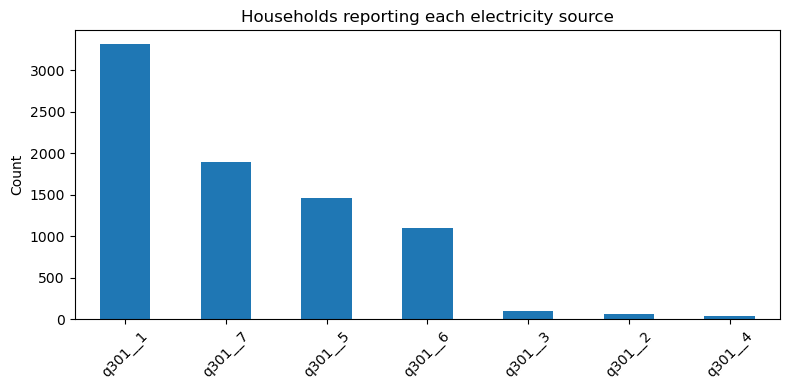

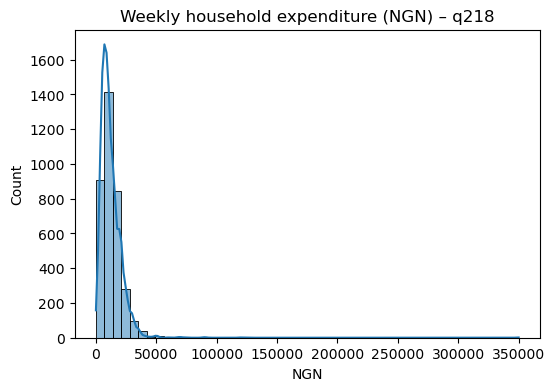

In [8]:
# --------------------------------------------------------------
## 2) Quick EDA (Exploratory Data Analysis)
# --------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

print("\n=== Dataset shape ===")
print(df.shape)

print("\n=== Missing values (top 20) ===")
print(df.isnull().sum().sort_values(ascending=False).head(20))

print("\n=== Numeric summary ===")
print(df.describe())

# Categorical snapshots
cat_cols = ['zone', 'state', 'lga', 'urca_cat', 'q206']   # roof type
for c in cat_cols:
    print(f"\n--- {c} (top 5) ---")
    print(df[c].value_counts(dropna=False).head())

# Electricity sources (q301__1 … q301__7)
elec_cols = [f'q301__{i}' for i in range(1, 8)]
elec_counts = df[elec_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
elec_counts.plot(kind='bar')
plt.title('Households reporting each electricity source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weekly expenditure distribution
plt.figure(figsize=(6,4))
sns.histplot(df['q218'].dropna(), bins=50, kde=True)
plt.title('Weekly household expenditure (NGN) – q218')
plt.xlabel('NGN')
plt.show()

## 3) KPI 1 — Electrification Rate (%)

In [9]:
# --------------------------------------------------------------
## 3) KPI 1 — Electrification Rate (%)
# --------------------------------------------------------------
elec_cols = [f'q301__{i}' for i in range(1, 8)]

# Safe assignment with .loc
df.loc[:, 'has_electricity'] = df[elec_cols].any(axis=1).astype(int)

electrification_rate = (df['has_electricity'].mean() * 100).round(2)
print(f"KPI 1 – Electrification Rate: {electrification_rate}%")

KPI 1 – Electrification Rate: 99.94%


## 4) KPI 2 — Reliability (choose the best available)

In [10]:
# --------------------------------------------------------------
## 4) KPI 2 — Reliability (choose the best available)
# --------------------------------------------------------------
# Grid-connected households
grid_connected = df['q301__1'] == 1

# Hours **with** grid electricity in the last 7 days → hours **without**
df.loc[:, 'grid_hours_without'] = 24 - df['q307_3'].fillna(0)

avg_hours_without = df.loc[grid_connected, 'grid_hours_without'].mean().round(2)
print(f"KPI 2 – Avg hours without power per day (grid HH): {avg_hours_without}h")

# Optional: outages per week
avg_outages_week = df.loc[grid_connected, 'q307_4'].mean().round(2)
print(f"   (Alternative) Avg outages per week (grid HH): {avg_outages_week}")

KPI 2 – Avg hours without power per day (grid HH): 17.65h
   (Alternative) Avg outages per week (grid HH): 4.84


## 5) KPI 3 — Energy Burden (% of total monthly expenditure or income)

In [11]:
# --------------------------------------------------------------
## 5) KPI 3 — Energy Burden (% of total monthly expenditure)
# --------------------------------------------------------------
# Electricity spend (monthly)
elec_spend = (
    df['q307_10'].fillna(0) +   # National grid bill
    df['q306_10'].fillna(0) +   # Minigrid bill
    df['q309'].fillna(0)        # Candles / batteries / torches
)

# Convert weekly non-electricity spend (q218) to monthly
weekly_non_elec = df['q218'].fillna(0)
monthly_non_elec = weekly_non_elec * 4.345   # more accurate than *4

total_monthly = monthly_non_elec + elec_spend

# Energy burden only for households that actually pay for electricity
df.loc[:, 'energy_burden'] = np.where(
    elec_spend > 0,
    (elec_spend / total_monthly) * 100,
    np.nan
)

avg_energy_burden = df['energy_burden'].mean().round(2)
print(f"KPI 3 – Avg Energy Burden (HH with electricity cost): {avg_energy_burden}%")

KPI 3 – Avg Energy Burden (HH with electricity cost): 9.32%
